# 一、传输层

这一层是网络栈中非常重要的一层，也是面试中经常考察的一个知识点。在传输层中一共包含两个协议，分别是UDP（用户数据包协议）和TCP（传输控制协议），前者只用了解就可以，后者则是考察的重点，需要重点去掌握。

通常网络层就已经能够保证将报文发送至目标主机，但是通常目标主机上使用网路通信服务的进程不只有一个，因此仅仅将报文发送至目标主机还远远不够，网络栈还应该提供“端到端”的服务，也就是将通信报文发送至目标进程的服务，在传输层中这种服务是通过端口号来实现的。无论是UDP还是TCP在报文头部都有源端口号和目标端口号两个字段，这两个字段都是4个字节，用于标识一个32位的端口号，而端口号又与进行通信的进程绑定（进程通常会监听特定端口号），通过这样的方法就完成了端到端的网络通信。

## `UDP`用户数据报协议

这种协议是一种无连接的传输层协议，也就是说它提供一种不可靠的通信服务，这种协议仅仅提供基础的端到端服务（即通过源端口号和目标端口号实现进程与进程之间通信）以及简单的差错校验。其主要特点包含以下三个方面：

1. UDP是无连接的：这主要是说UDP在通信时没有建立连接这个步骤，同样在结束通信时没有释放连接这个步骤。这一特点通信效率较高。

2. UDP尽最大努力交付：换句话说，这个特点是要告诉我们UDP不保证可靠的通信，如果发生了丢包之类的事情该协议是不管的。

3. UDP是面向报文的：这个特点的意思是当上层的应用程序选择UDP进行通信时给UDP多少数据UDP就会立刻发送多少数据，它不会因为数据过大而将数据拆分，也不会因为数据过少而等待一段时间以使报文达到一定长度后再发送。这一特点导致使用UDP时可能会发生报文过短传输效率过低或者报文过长网络层多次分片传输开销增大。

### `UDP`的数据校验

`UDP`支持数据校验，首先来看`UDP`的首部格式：

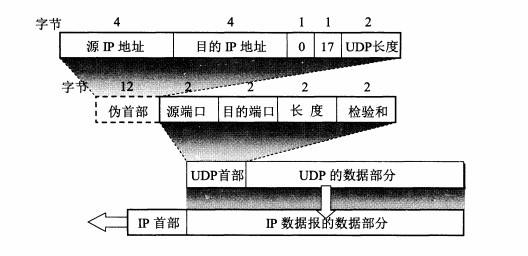

需要注意的是：`UDP`除了真正的首部之外还有一个“伪首部”，这个伪首部仅仅是在计算校验和的时候会用到。在校验数据的时候UDP使用**伪首部**，**首部**以及**数据**三部分计算校验和，将计算好的校验和放入UDP首部的**校验和**字段，以此达到校验数据的目的。UDP是十分简单的传输层协议，虽然只能实现不可靠的数据传输且没有拥塞控制机制，但也正是因为如此UDP能适合一些特殊的应用场景，比如说IP电话，在网络语音通话中由于人的语速是恒定的，因此为了保证通话质量最好不要使用拥塞控制来限制发送速率，而且语音通话中偶尔的信号丢失也是可以容忍的，正是因为以上的特点在网络通话中UDP使用的比较广泛。

## `TCP`传输控制协议

TCP是传输层应用最为广泛的协议了，在阅读《计算机网络》这本书关于TCP协议的介绍中，笔者觉得TCP的核心就是两点：

1. 可靠传输：TCP是要在底层不可靠的通信线路上实现可靠的网络通信，这个要求就是通过TCP协议来实现的，也是TCP要解决的核心问题之一。

2. 拥塞控制：这里的拥塞控制即可以理解为针对目标机器的流量控制，也可以理解为针对网络通信能力的拥塞控制。对于前者，是因为目标机器处理网络请求的能力有限，因此发送端必须针对目标机器的信息处理能力动态调整自己的信息发送速率来避免“发的太快，目标机器无法处理”的情景。而后者是因为网络的通信能力有限，如果不针对网络通信能力进行流量控制可能会造成多个及其同时通信造成网络负荷过高的现象。

TCP协议的特点有以下几点：

1. TCP是面线连接的：这一点和UDP相对，这是说TCP在通信之前需要首先建立连接，在通信完毕时也需要首先释放连接。

2. TCP只支持点对点的通信：UDP支持多播和组播，但是TCP只支持端到端的通信，即TCP不支持多播和组播。

3. TCP提供可靠的通信：这一点又是和UDP相对，这一特点也是TCP最大的特点之一。

4. TCP提供全双工通信：这是说使用TCP通信时通信的双方能够同时发送和接收消息。

5. TCP是面向字节流的：这一点和UDP相对，在TCP中并不是上层的应用程序发送多少数据就传送多少数据而是将这些数据放在一个缓冲当中，然后TCP协议根据当前的条件来发送这些位于缓冲中的字节。

刚才已经说了：TCP提供的是端到端的通信服务。而这个端指的就是套接字（socket），根据RFC793的定义：

>端口号拼接到IP地址即做套接字或插口。

TCP协议的报文首部字段如下所示：

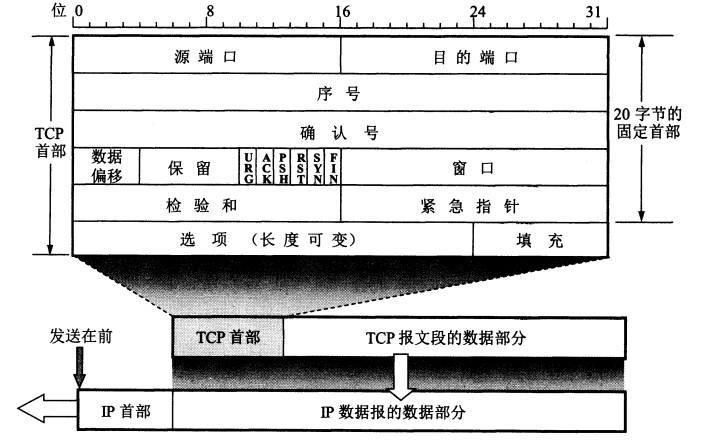

### `TCP`协议的可靠传输实现

TCP协议的可靠传输完全依靠TCP首部的“序号”和“确认号”两个字段来实现，其核心思想就是：发送方发送一个TCP报文，这个报文会有一个序号，接收方在接受到这个报文后需要给发送方发送一个TCP报文并且在“确认号”中标识该报文，告诉发送方已经收到。如果发送方在规定时间内没有收到接受方的确认报文就认为这个报文在传输中丢失了，就会启动重传。

在实际实现的时候TCP协议会维护一个缓冲，应用程序需要发送数据时就将数据放入到缓冲中，TCP会在缓冲中维护一个“发送窗口”，TCP会发送在发送窗口中的数据。缓冲中的数据依据字节进行编号：

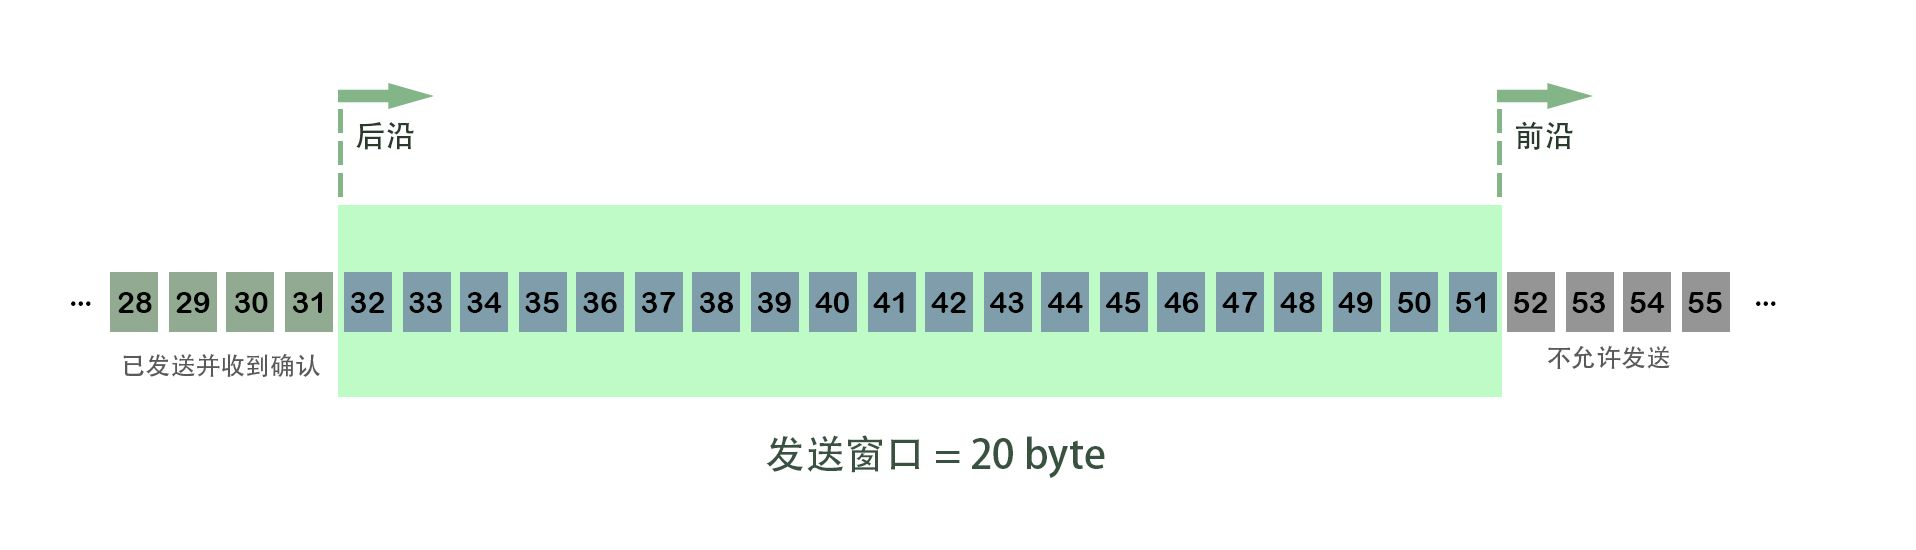

如上图所示：